                                            Census Income Project

Problem Statement:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [188]:
# import important liblaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [189]:
# print top data

df=pd.read_csv(r'D:\Vishakha_eval\2\Census.csv')

df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [190]:
df.shape

(32560, 15)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [192]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

dataset not contain missing value

In [193]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [194]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [195]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [196]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Native_country has ? value

In [197]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [198]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [199]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [200]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

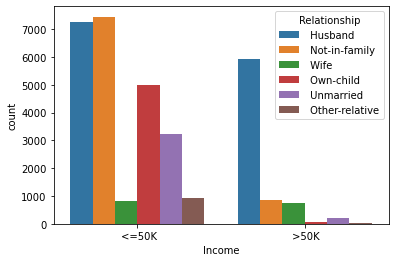

In [201]:
sns.countplot(df['Income'], hue='Relationship', data=df);

In [202]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

Replace ? 

In [203]:
df['Workclass'] = df['Workclass'].replace(' ?', 'Private')
df['Occupation'] = df['Occupation'].replace(' ?', 'Prof-specialty')
df['Native_country'] = df['Native_country'].replace(' ?', 'United-States')

In [204]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [205]:
#feature 

In [206]:
# education Category
df.Education= df.Education.replace([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th'], 'School')
df.Education = df.Education.replace(' HS-grad', ' High school')
df.Education = df.Education.replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school', ' Some-college'], 'Higher')
df.Education = df.Education.replace(' Bachelors', 'Grad')
df.Education = df.Education.replace(' Masters', 'Master')
df.Education = df.Education.replace(' Doctorate', 'Postgrad')

In [207]:
df['Education'].unique()

array(['Grad', ' High school', 'School', 'Master', 'Higher', 'Postgrad'],
      dtype=object)

In [208]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [209]:
df['Marital_status']= df['Marital_status'].replace([' Married-civ-spouse', ' Married-AF-spouse'],'Married')
df['Marital_status']= df['Marital_status'].replace([' Never-married'], 'Not-married')
df['Marital_status']= df['Marital_status'].replace([' Divorced', ' Separated',' Widowed',' Married-spouse-absent'],'Other')

In [243]:
df.Income = df.Income.replace(' <=50K', 0)
df.Income = df.Income.replace(' >50K', 1)

In [244]:
df.Income=pd.to_numeric(df.Income)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [247]:
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Grad,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,High school,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Grad,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Master,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,School,5,Other,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,High school,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Master,14,Not-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Grad,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Higher,10,Married,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


In [248]:
df['Marital_status'].value_counts()

Married        14999
Not-married    10682
Other           6879
Name: Marital_status, dtype: int64

In [249]:
df['Education'].value_counts()

 High school    10501
Higher          10316
Grad             5354
School           4253
Master           1723
Postgrad          413
Name: Education, dtype: int64

In [250]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


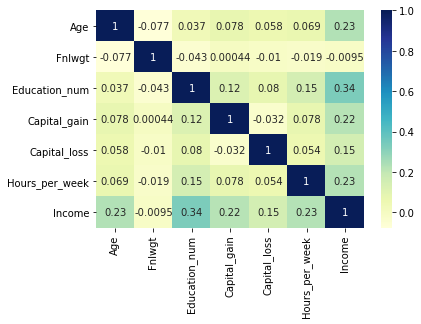

In [251]:
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu");

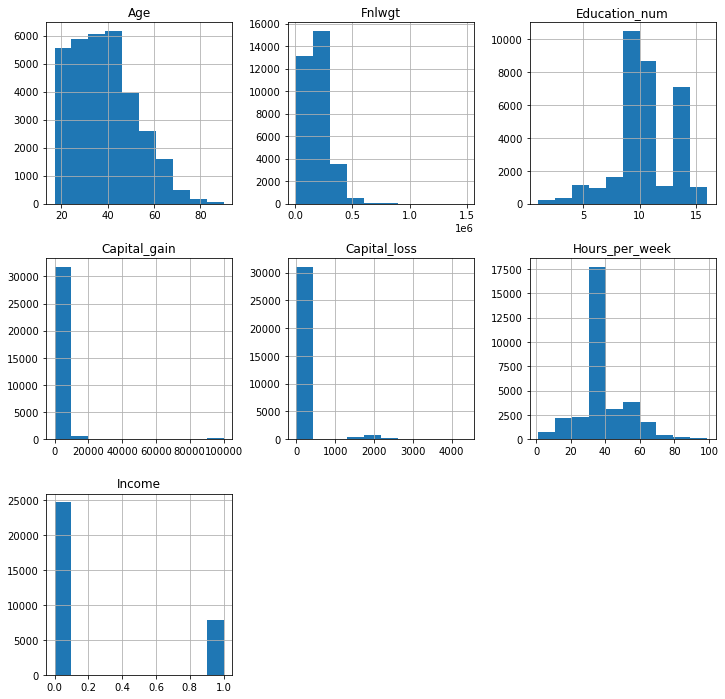

In [255]:
df.hist(figsize=(12,12),layout=(3,3), sharex=False);

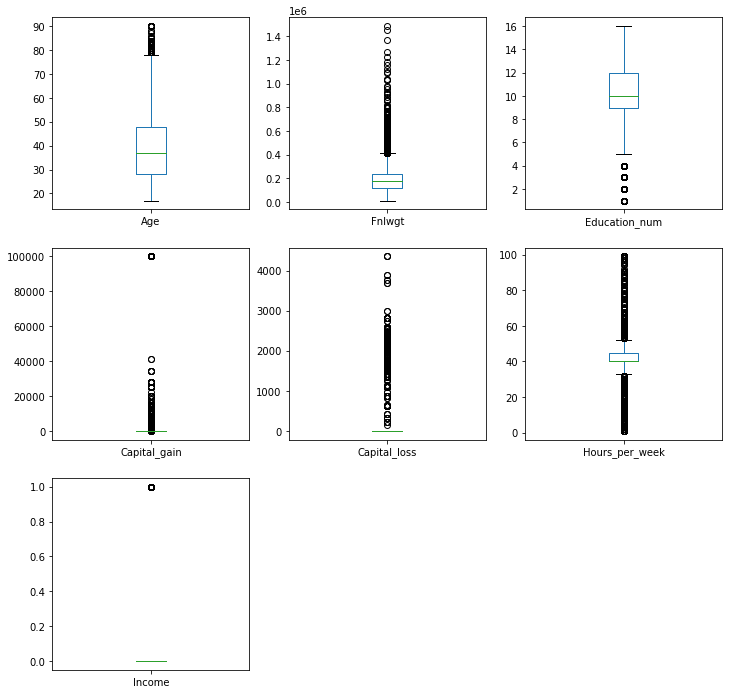

In [253]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

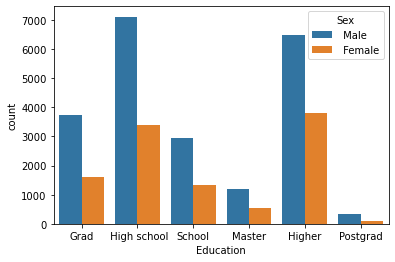

In [219]:
sns.countplot(df['Education'], hue='Sex', data=df);

In [220]:
X= df.drop(['Income'], axis=1)
y = df['Income']

split the data in test and train

In [275]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

label encoding

In [222]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [223]:
data= df.copy()
data= data.apply(LabelEncoder().fit_transform)
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,1,12,0,3,0,4,1,0,0,12,38,0
1,21,3,14085,0,8,2,5,1,4,1,0,0,39,38,0
2,36,3,15335,5,6,0,5,0,2,1,0,0,39,38,0
3,11,3,19354,1,12,0,9,5,2,0,0,0,39,4,0
4,20,3,17699,3,13,0,3,5,4,0,0,0,39,38,0


In [224]:
ss= StandardScaler().fit(data.drop('Income', axis=1))

In [225]:
X= ss.transform(data.drop('Income', axis=1))
y= data['Income']

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

apply LogisticRegression

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.843
Acc on test data: 0.829


apply RandomForestClassifier

In [228]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

Acc on training data: 1.000
Acc on test data: 0.856


In [229]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [230]:
print(confusion_matrix(y_test, prediction1))

[[6891  463]
 [ 939 1475]]


In [231]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7354
           1       0.76      0.61      0.68      2414

    accuracy                           0.86      9768
   macro avg       0.82      0.77      0.79      9768
weighted avg       0.85      0.86      0.85      9768



In [263]:
import pickle
filename="Sales.pk1"
pickle.dump(rfc,open(filename,'wb'))

In [264]:
loaded_model=pickle.load(open('Sales.pk1','rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.8564701064701065


In [271]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],prediction1[:]],index=["predicted","orginal"])

In [272]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,9758,9759,9760,9761,9762,9763,9764,9765,9766,9767
predicted,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
orginal,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
